In [1]:
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Amazon%20Top%20Rated%20Smartphones%20%26%20Accessories%202021/Amazon%20Top%20Rated%20Smartphones%20%20Accessories%202021%20%20%20-%20amazon_top_rated_smartphones.csv")

In [3]:
df.head()

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
3,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.2 out of 5 stars,"95,519","₹13,999","₹15,999","Save ₹2,000 (13%)",FREE Delivery by Amazon,NaN
4,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN


In [4]:
df.isnull().sum()

Smartphone                         0
Rating                             0
Reviews count                      0
Offer price                      214
Actual price                     326
Saving                           217
Delivery                         683
Status of stock & more offers    870
dtype: int64

<AxesSubplot:>

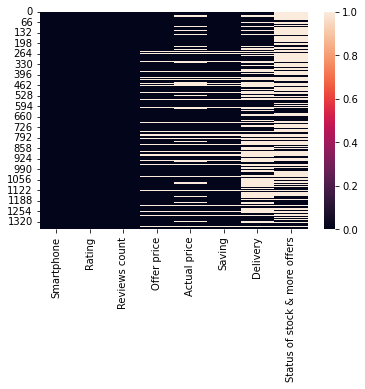

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
count,1368,1368,1368,1154,1042,1151,685,498
unique,1308,11,363,511,281,612,4,17
top,Nillkin Case for Xiaomi Mi 11X 11 X / 11X Pro/...,4.2 out of 5 stars,1,"₹1,299","₹2,999",Get it by,FREE Delivery by Amazon,Only 1 left in stock.
freq,3,279,173,22,35,88,604,280


In [7]:
names = df['Smartphone']
names=names.str.lower()
names.head()
from collections import Counter
lis = []
for i in names:
    for j in i.split():
        lis.append(j)
freq = Counter(lis)
     
most_occur = freq.most_common(100)
print(most_occur)

[('ram,', 608), ('storage)', 555), ('with', 417), ('pro', 335), ('128gb', 285), ('case', 282), ('apple', 278), ('iphone', 251), ('for', 243), ('-', 224), ('samsung', 213), ('galaxy', 206), ('12', 203), ('|', 193), ('nillkin', 193), ('8gb', 186), ('64gb', 183), ('blue,', 169), ('6gb', 168), ('4gb', 165), ('redmi', 161), ('vivo', 160), ('5g', 154), ('camera', 149), ('cost', 144), ('exchange', 144), ('no', 143), ('offers', 139), ('new', 137), ('black,', 135), ('emi/additional', 125), ('dual', 122), ('+', 122), ('oppo', 116), ('inch)', 115), ('note', 113), ('cover', 107), ('phone', 103), ('back', 96), ('black', 95), ('and', 89), ('color', 87), ('(black)', 86), ('super', 85), ('mi', 82), ('mobile', 82), ('32gb', 81), ('realme', 80), ('hard', 79), ('sim', 78), ('pc', 76), ('screen', 75), ('max', 71), ('plus', 71), ('frosted', 70), ('ultra', 69), ('256gb', 68), ('blue', 67), ('&', 65), ('6', 63), ('power', 62), ('without', 62), ('display', 60), ('3gb', 58), ('lava', 58), ('gb', 58), ('9', 56)

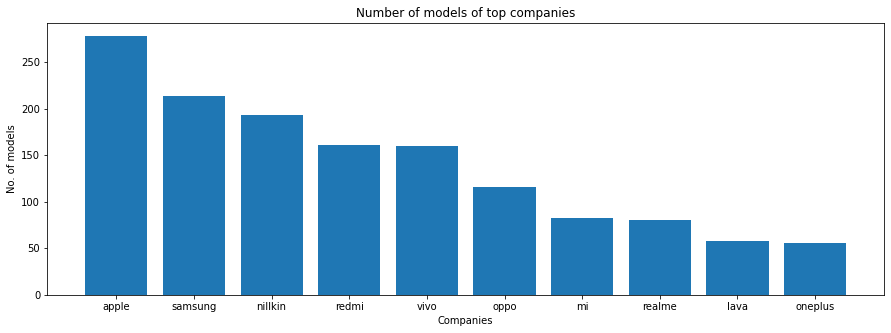

In [8]:
top_companies=['apple','samsung','nillkin','redmi','vivo','oppo','mi','realme','lava','oneplus']
no_of_models=[]
for i in top_companies:
    no_of_models.append(freq[i])


fig = plt.figure(figsize = (15, 5))
plt.bar(top_companies, no_of_models)
plt.xlabel("Companies")
plt.ylabel("No. of models")
plt.title("Number of models of top companies")
plt.show()

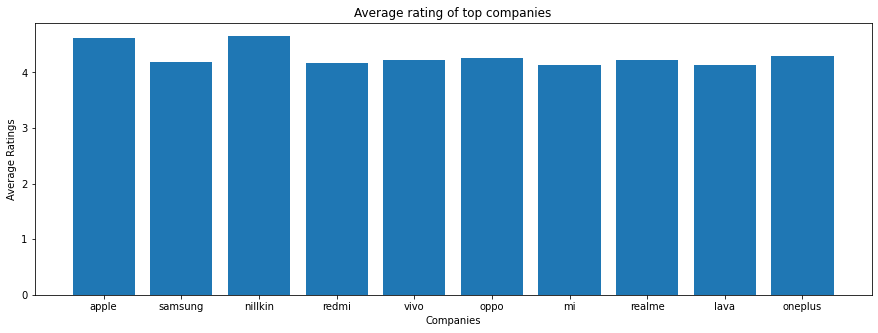

In [9]:
r_apple=0
n_apple=0
r_samsung=0
n_samsung=0
r_nillkin=0
n_nillkin=0
r_redmi=0
n_redmi=0
r_vivo=0
n_vivo=0
r_oppo=0
n_oppo=0
r_mi=0
n_mi=0
r_realme=0
n_realme=0
r_lava=0
n_lava=0
r_oneplus=0
n_oneplus=0
c=0
for i in names:
    for j in i.split():
        if(j=='apple'):
            r_apple = r_apple +float(df['Rating'][c][0:3])
            n_apple=n_apple+1
            break
        if(j=='samsung'):
            r_samsung = r_samsung +float(df['Rating'][c][0:3])
            n_samsung=n_samsung+1
            break
        if(j=='nillkin'):
            r_nillkin = r_nillkin +float(df['Rating'][c][0:3])
            n_nillkin=n_nillkin+1
            break
        if(j=='redmi'):
            r_redmi = r_redmi +float(df['Rating'][c][0:3])
            n_redmi=n_redmi+1
            break
        if(j=='vivo'):
            r_vivo = r_vivo +float(df['Rating'][c][0:3])
            n_vivo=n_vivo+1
            break
        if(j=='oppo'):
            r_oppo = r_oppo +float(df['Rating'][c][0:3])
            n_oppo=n_oppo+1
            break
        if(j=='mi'):
            r_mi = r_mi +float(df['Rating'][c][0:3])
            n_mi=n_mi+1
            break
        if(j=='realme'):
            r_realme = r_realme +float(df['Rating'][c][0:3])
            n_realme=n_realme+1
            break
        if(j=='lava'):
            r_lava = r_lava +float(df['Rating'][c][0:3])
            n_lava=n_lava+1
            break
        if(j=='oneplus'):
            r_oneplus = r_oneplus +float(df['Rating'][c][0:3])
            n_oneplus=n_oneplus+1
            break
        
    c=c+1
avgr=[]
avgr_apple =r_apple/n_apple
avgr.append(avgr_apple)
avgr_samsung = r_samsung/n_samsung
avgr.append(avgr_samsung)
avgr_nillkin = r_nillkin/n_nillkin
avgr.append(avgr_nillkin)
avgr_redmi = r_redmi/n_redmi
avgr.append(avgr_redmi)
avgr_vivo = r_vivo/n_vivo
avgr.append(avgr_vivo)
avgr_oppo = r_oppo/n_oppo
avgr.append(avgr_oppo)
avgr_mi = r_mi/n_mi
avgr.append(avgr_mi)
avgr_realme = r_realme/n_realme
avgr.append(avgr_realme)
avgr_lava = r_lava/n_lava
avgr.append(avgr_lava)
avgr_oneplus = r_oneplus/n_oneplus
avgr.append(avgr_oneplus)
fig = plt.figure(figsize = (15, 5))
plt.bar(top_companies, avgr)
plt.xlabel("Companies")
plt.ylabel("Average Ratings")
plt.title("Average rating of top companies")
plt.show()

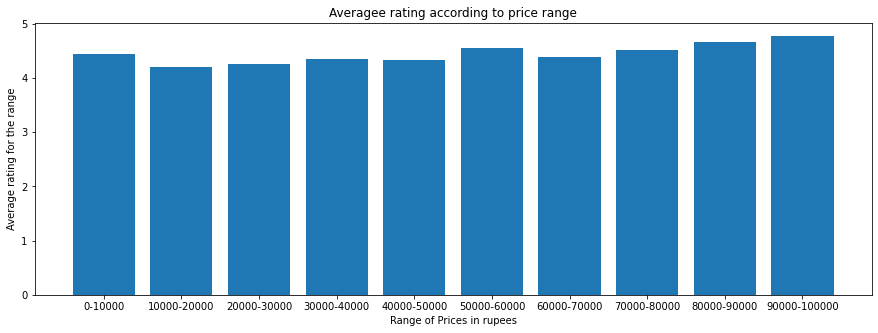

In [10]:
n_1=0
n_2=0
n_3=0
n_4=0
n_5=0
n_6=0
n_7=0
n_8=0
n_9=0
n_10=0
r_1=0
r_2=0
r_3=0
r_4=0
r_5=0
r_6=0
r_7=0
r_8=0
r_9=0
r_10=0
for i in range(0,1368):
    if df['Offer price'][i] is not 'nan':
        df['Offer price'][i]=str(df['Offer price'][i]).replace(',','')
        df['Offer price'][i]=str(df['Offer price'][i]).replace('₹','')
        df['Offer price'][i]=float(df['Offer price'][i])
        if 0<df['Offer price'][i] and df['Offer price'][i]<10000:
            n_1=n_1+1
            r_1=r_1+float(df['Rating'][i][0:3])
        if 10000<df['Offer price'][i] and df['Offer price'][i]<20000:
            n_2=n_2+1
            r_2=r_2+float(df['Rating'][i][0:3])
        if 20000<df['Offer price'][i] and df['Offer price'][i]<30000:
            n_3=n_3+1
            r_3=r_3+float(df['Rating'][i][0:3])
        if 30000<df['Offer price'][i] and df['Offer price'][i]<40000:
            n_4=n_4+1
            r_4=r_4+float(df['Rating'][i][0:3])
        if 40000<df['Offer price'][i] and df['Offer price'][i]<50000:
            n_5=n_5+1
            r_5=r_5+float(df['Rating'][i][0:3])
        if 50000<df['Offer price'][i] and df['Offer price'][i]<60000:
            n_6=n_6+1
            r_6=r_6+float(df['Rating'][i][0:3])
        if 60000<df['Offer price'][i] and df['Offer price'][i]<70000:
            n_7=n_7+1
            r_7=r_7+float(df['Rating'][i][0:3])
        if 70000<df['Offer price'][i] and df['Offer price'][i]<80000:
            n_8=n_8+1
            r_8=r_8+float(df['Rating'][i][0:3])
        if 80000<df['Offer price'][i] and df['Offer price'][i]<90000:
            n_9=n_9+1
            r_9=r_9+float(df['Rating'][i][0:3])
        if 90000<df['Offer price'][i] and df['Offer price'][i]<100000:
            n_10=n_10+1
            r_10=r_10+float(df['Rating'][i][0:3])
                
l=[r_1/n_1,r_2/n_2,r_3/n_3,r_4/n_4,r_5/n_5,r_6/n_6,r_7/n_7,r_8/n_8,r_9/n_9,r_10/n_10]
fig = plt.figure(figsize = (15, 5))
plt.bar(['0-10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000'],l)
plt.xlabel("Range of Prices in rupees")
plt.ylabel('Average rating for the range')
plt.title("Averagee rating according to price range")
plt.show()